#Demo
Showcases the structure of key points from c3d file after cleaning in three dimentions.

Key point count: 39 x 3 dim

In [31]:
# verify if GPU is available
import tensorflow as tf
from tensorflow.python.client import device_lib

print("GPUs Available: ", (tf.test.is_gpu_available()))

GPUs Available:  True


In [32]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [33]:
recording = pd.read_csv("data/samples/healthy/train/recording_01/recording_key_points.csv", header = 0)

<ipython-input-33-206d568e9ae3>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,

In [34]:
recording.shape

(1547, 574)

In [35]:
recording.head()

,Time,LFHD,Unnamed: 2,Unnamed: 3,RFHD,Unnamed: 5,Unnamed: 6,LBHD,Unnamed: 8,Unnamed: 9,RBHD,Unnamed: 11,Unnamed: 12,C7,Unnamed: 14,Unnamed: 15,T10,Unnamed: 17,Unnamed: 18,CLAV,Unnamed: 20,Unnamed: 21,STRN,Unnamed: 23,Unnamed: 24,RBAK,Unnamed: 26,Unnamed: 27,LSHO,Unnamed: 29,Unnamed: 30,LUPA,Unnamed: 32,Unnamed: 33,LELB,Unnamed: 35,Unnamed: 36,LFRM,Unnamed: 38,Unnamed: 39,LWRA,Unnamed: 41,Unnamed: 42,LWRB,Unnamed: 44,Unnamed: 45,LFIN,Unnamed: 47,Unnamed: 48,RSHO,Unnamed: 50,Unnamed: 51,RUPA,Unnamed: 53,Unnamed: 54,RELB,Unnamed: 56,Unnamed: 57,RFRM,Unnamed: 59,Unnamed: 60,RWRA,Unnamed: 62,Unnamed: 63,RWRB,Unnamed: 65,Unnamed: 66,RFIN,Unnamed: 68,Unnamed: 69,LASI,Unnamed: 71,Unnamed: 72,RASI,Unnamed: 74,Unnamed: 75,LPSI,Unnamed: 77,Unnamed: 78,RPSI,Unnamed: 80,Unnamed: 81,LTHI,Unnamed: 83,Unnamed: 84,LKNE,Unnamed: 86,Unnamed: 87,LTIB,Unnamed: 89,Unnamed: 90,LANK,Unnamed: 92,Unnamed: 93,LHEE,Unnamed: 95,Unnamed: 96,LTOE,Unnamed: 98,Unnamed: 99,RTHI,Unnamed: 101,Unnamed: 102,RKNE,Unnamed: 104,Unnamed: 105,RTIB,Unnamed: 107,Unnamed: 108,RANK,Unnamed: 110,Unnamed: 111,RHEE,Unnamed: 113,Unnamed: 114,RTOE,Unnamed: 116,Unnamed: 117,PELO,Unnamed: 119,Unnamed: 120,PELA,Unnamed: 122,Unnamed: 123,PELL,Unnamed: 125,Unnamed: 126,PELP,Unnamed: 128,Unnamed: 129,LFEO,Unnamed: 131,Unnamed: 132,LFEA,Unnamed: 134,Unnamed: 135,LFEL,Unnamed: 137,Unnamed: 138,LFEP,Unnamed: 140,Unnamed: 141,LTIO,Unnamed: 143,Unnamed: 144,LTIA,Unnamed: 146,Unnamed: 147,LTIL,Unnamed: 149,Unnamed: 150,LTIP,Unnamed: 152,Unnamed: 153,LFOO,Unnamed: 155,Unnamed: 156,LFOA,Unnamed: 158,Unnamed: 159,LFOL,Unnamed: 161,Unnamed: 162,LFOP,Unnamed: 164,Unnamed: 165,LTOO,Unnamed: 167,Unnamed: 168,LTOA,Unnamed: 170,Unnamed: 171,LTOL,Unnamed: 173,Unnamed: 174,LTOP,Unnamed: 176,Unnamed: 177,RFEO,Unnamed: 179,Unnamed: 180,RFEA,Unnamed: 182,Unnamed: 183,RFEL,Unnamed: 185,Unnamed: 186,RFEP,Unnamed: 188,Unnamed: 189,RTIO,Unnamed: 191,Unnamed: 192,RTIA,Unnamed: 194,Unnamed: 195,RTIL,Unnamed: 197,Unnamed: 198,RTIP,Unnamed: 200,Unnamed: 201,RFOO,Unnamed: 203,Unnamed: 204,RFOA,Unnamed: 206,Unnamed: 207,RFOL,Unnamed: 209,Unnamed: 210,RFOP,Unnamed: 212,Unnamed: 213,RTOO,Unnamed: 215,Unnamed: 216,RTOA,Unnamed: 218,Unnamed: 219,RTOL,Unnamed: 221,Unnamed: 222,RTOP,Unnamed: 224,Unnamed: 225,HEDO,Unnamed: 227,Unnamed: 228,HEDA,Unnamed: 230,Unnamed: 231,HEDL,Unnamed: 233,Unnamed: 234,HEDP,Unnamed: 236,Unnamed: 237,LCLO,Unnamed: 239,Unnamed: 240,LCLA,Unnamed: 242,Unnamed: 243,LCLL,Unnamed: 245,Unnamed: 246,LCLP,Unnamed: 248,Unnamed: 249,RCLO,Unnamed: 251,Unnamed: 252,RCLA,Unnamed: 254,Unnamed: 255,RCLL,Unnamed: 257,Unnamed: 258,RCLP,Unnamed: 260,Unnamed: 261,TRXO,Unnamed: 263,Unnamed: 264,TRXA,Unnamed: 266,Unnamed: 267,TRXL,Unnamed: 269,Unnamed: 270,TRXP,Unnamed: 272,Unnamed: 273,LHUO,Unnamed: 275,Unnamed: 276,LHUA,Unnamed: 278,Unnamed: 279,LHUL,Unnamed: 281,Unnamed: 282,LHUP,Unnamed: 284,Unnamed: 285,LRAO,Unnamed: 287,Unnamed: 288,LRAA,Unnamed: 290,Unnamed: 291,LRAL,Unnamed: 293,Unnamed: 294,LRAP,Unnamed: 296,Unnamed: 297,LHNO,Unnamed: 299,Unnamed: 300,LHNA,Unnamed: 302,Unnamed: 303,LHNL,Unnamed: 305,Unnamed: 306,LHNP,Unnamed: 308,Unnamed: 309,RHUO,Unnamed: 311,Unnamed: 312,RHUA,Unnamed: 314,Unnamed: 315,RHUL,Unnamed: 317,Unnamed: 318,RHUP,Unnamed: 320,Unnamed: 321,RRAO,Unnamed: 323,Unnamed: 324,RRAA,Unnamed: 326,Unnamed: 327,RRAL,Unnamed: 329,Unnamed: 330,RRAP,Unnamed: 332,Unnamed: 333,RHNO,Unnamed: 335,Unnamed: 336,RHNA,Unnamed: 338,Unnamed: 339,RHNL,Unnamed: 341,Unnamed: 342,RHNP,Unnamed: 344,Unnamed: 345,CentreOfMass,Unnamed: 347,Unnamed: 348,CentreOfMassFloor,Unnamed: 350,Unnamed: 351,LHipAngles,Unnamed: 353,Unnamed: 354,LKneeAngles,Unnamed: 356,Unnamed: 357,LAbsAnkleAngle,Unnamed: 359,Unnamed: 360,LAnkleAngles,Unnamed: 362,Unnamed: 363,RHipAngles,Unnamed: 365,Unnamed: 366,RKneeAngles,Unnamed: 368,Unnamed: 369,RAnkleAngles,Unnamed: 371,Unnamed: 372,RAbsAnkleAngle,Unnamed: 374,Unnamed: 375,LPelvisAngles,Unnamed: 377,Unnamed: 378,RPelvisAngles,Unnamed: 380,Unnamed: 381,LFootProgressAngles,Unnamed: 38

In [36]:
def structurize_df(recording):
  suffices = ['X', 'Y', 'Z']
  columns = recording.columns[1::3]
  mappings = {col: f'{columns[i//3]}_{suffices[i%3]}' for i, col in enumerate(recording.columns[1:])}
  recording = recording.rename(columns=mappings)
  df = recording.iloc[2:, 1:118].reset_index(drop=True)
  return df

In [37]:
df = structurize_df(recording)

In [38]:
df.shape

(1545, 117)

In [39]:
df[:10]

,LFHD_X,LFHD_Y,LFHD_Z,RFHD_X,RFHD_Y,RFHD_Z,LBHD_X,LBHD_Y,LBHD_Z,RBHD_X,RBHD_Y,RBHD_Z,C7_X,C7_Y,C7_Z,T10_X,T10_Y,T10_Z,CLAV_X,CLAV_Y,CLAV_Z,STRN_X,STRN_Y,STRN_Z,RBAK_X,RBAK_Y,RBAK_Z,LSHO_X,LSHO_Y,LSHO_Z,LUPA_X,LUPA_Y,LUPA_Z,LELB_X,LELB_Y,LELB_Z,LFRM_X,LFRM_Y,LFRM_Z,LWRA_X,LWRA_Y,LWRA_Z,LWRB_X,LWRB_Y,LWRB_Z,LFIN_X,LFIN_Y,LFIN_Z,RSHO_X,RSHO_Y,RSHO_Z,RUPA_X,RUPA_Y,RUPA_Z,RELB_X,RELB_Y,RELB_Z,RFRM_X,RFRM_Y,RFRM_Z,RWRA_X,RWRA_Y,RWRA_Z,RWRB_X,RWRB_Y,RWRB_Z,RFIN_X,RFIN_Y,RFIN_Z,LASI_X,LASI_Y,LASI_Z,RASI_X,RASI_Y,RASI_Z,LPSI_X,LPSI_Y,LPSI_Z,RPSI_X,RPSI_Y,RPSI_Z,LTHI_X,LTHI_Y,LTHI_Z,LKNE_X,LKNE_Y,LKNE_Z,LTIB_X,LTIB_Y,LTIB_Z,LANK_X,LANK_Y,LANK_Z,LHEE_X,LHEE_Y,LHEE_Z,LTOE_X,LTOE_Y,LTOE_Z,RTHI_X,RTHI_Y,RTHI_Z,RKNE_X,RKNE_Y,RKNE_Z,RTIB_X,RTIB_Y,RTIB_Z,RANK_X,RANK_Y,RANK_Z,RHEE_X,RHEE_Y,RHEE_Z,RTOE_X,RTOE_Y,RTOE_Z
0,215.855,-134.003,1685.53,84.7081,-148.96,1686.7,204.128,35.907,1614.76,63.9307,23.2158,1622.08,141.472,70.2876,1545.6,133.306,121.519,1268.47,136.447,-75.6725,1439.55,128.432,-115.187,1234.68,41.776,130.149,1392.65,291.182,23.7933,1525.24,478.164,56.0044,1492.23,602.133,22.245,1460.57,687.304,-7.37066,1466.47,804.049,-158.796,1519.53,837.148,-98.156,1504.62,892.505,-151.022,1539.18,-9.17146,44.0284,1527.97,-236.388,67.8635,1440.61,-330.532,41.0716,1436.62,-482.026,-4.17039,1459.48,-562.21,-110.069,1487.91,-570.516,-39.9018,1477.85,-652.51,-88.8953,1498.43,266.067,-75.1047,993.215,9.80518,-90.8591,995.242,174.592,97.343,1039.73,89.1436,97.9603,1035.1,316.039,21.8491,665.41,305.102,53.5449,500.273,311.817,71.9341,340.386,289.364,54.9885,93.2424,233.002,101.785,59.6903,273.057,-109.191,74.4908,-57.8861,-15.2082,742.655,-25.1535,68.5144,495.328,-27.0609,94.3679,273.517,-21.1177,68.0043,89.9386,40.875,105.828,54.4452,-34.8698,-100.797,67.7375
1,215.696,-134.473,1685.43,84.5579,-149.394,1686.54,204.024,35.5595,1614.99,63.8436,22.832,1622.24,141.376,70.0021,1545.75,133.176,121.553,1268.7,136.325,-75.8665,1439.59,128.322,-114.949,1234.67,41.7407,130.054,1392.87,291.164,23.5143,1525.31,478.112,55.8203,1492.25,602.078,22.2258,1460.51,687.251,-7.43041,1466.33,804.131,-158.802,1519.18,837.171,-98.1408,1504.3,892.626,-150.947,1538.77,-9.2578,43.7908,1528.13,-236.471,67.8734,1440.74,-330.615,41.1412,1436.69,-482.124,-4.0618,1459.46,-562.357,-109.977,1487.69,-570.665,-39.7765,1477.7,-652.631,-88.8465,1498.31,266.017,-74.8058,993.347,9.78788,-90.5723,995.383,174.528,97.6715,1039.76,89.1206,98.3196,1035.17,316.213,21.3767,665.426,305.272,52.7668,500.269,311.941,71.338,340.373,289.439,54.9022,93.2094,233.058,101.839,59.6448,273.318,-109.22,74.6467,-58.0264,-15.3776,742.774,-25.3669,68.0304,495.323,-26.9675,94.1686,273.546,-21.112,68.011,89.9443,40.8995,105.949,54.3802,-35.1541,-100.868,67.9952
2,215.53,-134.986,1685.28,84.3994,-149.865,1686.32,203.918,35.1922,1615.23,63.7525,22.4336,1622.42,141.275,69.7365,1545.88,133.048,121.554,1268.89,136.202,-76.055,1439.62,128.215,-114.751,1234.66,41.6957,129.95,1393.06,291.132,23.2522,1525.38,478.051,55.6277,1492.27,602.014,22.1717,1460.46,687.186,-7.52206,1466.22,804.183,-158.848,1518.88,837.171,-98.1678,1504.03,892.713,-150.922,1538.41,-9.34699,43.5666,1528.28,-236.56,67.8636,1440.85,-330.702,41.1842,1436.76,-482.223,-3.98078,1459.45,-562.506,-109.904,1487.51,-570.811,-39.6772,1477.57,-652.756,-88.8069,1498.21,265.976,-74.5626,993.465,9.77119,-90.35,995.508,174.467,97.9402,1039.78,89.0923,98.6091,1035.22,316.363,20.9038,665.431,305.428,52.0173,500.264,312.055,70.7471,340.36,289.501,54.8154,93.1818,233.112,101.882,59.6079,273.539,-109.254,74.7816,-58.1518,-15.5851,742.877,-25.587,67.5153,495.314,-26.9173,93.9122,273.565,-21.0989,67.9975,89.9505,40.9222,106.055,54.3206,-35.3817,-100.924,68.1986
3,215.359,-135.542,1685.09,84.2325,-150.372,1686.04,203.811,34.8051,1615.49,63.6573,22.0208,1622.6,141.172,69.4909,1545.99,132.923,121.522,1269.06,136.077,-76.2379,1439.66,128.11,-114.593,1234.66,41.6407,129.834,1393.23,291.089,23.0071,1525.44,477.981,55.4267,1492.29,601.941,22.0828,1460.43,687.108,-7.64557,1466.13,80

In [40]:
!pip install plotly
!pip install kaleido

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [41]:
# import plotly.graph_objects as go
# fig= go.Figure(go.Scatter3d(x=point_cloud[200,:, 0],
#                                 y=point_cloud[200,:, 1],
#                                 z=point_cloud[200,:, 2]))
# fig.write_html("data/visualisation/fig1.html")

#Preprocessing

In [42]:
import glob 
import os
import sys
import numpy as np
from pathlib import Path

MAX_FRAMES = 5000
DATA_DIR = "data"
POINTS = 39
DIM = 3

def structurize_df(recording: pd.DataFrame) -> pd.DataFrame:
    '''Converts raw dataset into clean dataset 
         Args:
              - recording: pd.Dataframe -> (n_frames, 574)
         Returns:
              - df_clean: pd.Dataframe -> (n_frames, 117)
    '''
    suffices = ['X', 'Y', 'Z']
    columns = recording.columns[1::3]
    mappings = {col: f'{columns[i//3]}_{suffices[i%3]}' for i, col in enumerate(recording.columns[1:])}
    recording = recording.rename(columns=mappings)
    df_clean = recording.iloc[2:, 1:118].reset_index(drop=True)
    return df_clean


def convert_2_array(df: pd.DataFrame, max_frames = MAX_FRAMES, points = POINTS, dim = DIM) -> np.array:
    '''Converts clean dataset into
         Args:
              - df: (n_frames, 117) 
              - max_frames: MAX_FRAMES 
              - points: POINTS
              - dim: DIM 
         Returns:
              - point_cloud: np.array -> (n_frames, n_points, n_dim)
    '''
    pre_point_cloud = df.to_numpy().astype(float)
    frames = pre_point_cloud.shape[0]
    point_cloud_full = np.reshape(pre_point_cloud, (frames, points, dim)) # (1545, 39, 3)
    point_cloud = point_cloud_full[:max_frames] # limit to max threshold
    return point_cloud


def introduce_distortion(point_cloud: np.array) -> np.array:
    '''Converts clean dataset into
         Args:
              - point_cloud: origin -> (n_frames, n_points, n_dim)
         Returns:
              - point_cloud: distorted -> (n_frames, n_points, n_dim)
    '''
    point_cloud+= tf.random.uniform(point_cloud.shape, 40, 50, dtype=tf.float64)
    return point_cloud


def parse_dataset():
    '''Converts source files (c3d transitioned into csv) into train & test dataset
         Returns:
              - (train_points, train_labels, classes): tuple(np.array, np.array, list) -> ((n_samples, n_frames, n_points, n_dim), (n_samples,), (n_classes))
    '''
    train_points = []
    train_labels = []
    test_points = []
    test_labels = []
    point_cloud = []
    classes = glob.glob("data/samples/*", recursive = True)

    for label, folder in enumerate(classes): # healthy, AD, PD
        print("Currently processing class: {}".format(os.path.basename(folder)))

        train_folders = glob.glob(os.path.join(folder, "train/*")) # recording_01 etc.
        test_folders = glob.glob(os.path.join(folder, "test/*"))

        for f in train_folders: # recording_01 etc.
            train_file = glob.glob(os.path.join(f, "recording_key_points.csv"))
            print("\n", train_file)
            recording = pd.read_csv(train_file[0], header = 0)
            df = structurize_df(recording)
            point_cloud = convert_2_array(df)

            # temporarily introduce distortion to simulate disorder => remove once actual AD/PD data received 
            if label!=0:
              point_cloud = introduce_distortion(point_cloud)

            train_points.append(point_cloud)
            train_labels.append(label)

        # TODO:
        # for f in test_folders:
        #     train_file = glob.glob(os.path.join(f, "recording_key_points.csv"))
        #     # test_points.append(trimesh.load(f).sample(num_points))
        #     # test_labels.append(i)

    return (np.array(train_points), np.array(train_labels), classes)

In [43]:
train_points, train_labels, classes = parse_dataset()

Currently processing class: AD

 ['data/samples/AD/train/recording_01/recording_key_points.csv']


<ipython-input-42-8686ee34b710>:76: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262


 ['data/samples/AD/train/recording_02/recording_key_points.csv']
Currently processing class: healthy

 ['data/samples/healthy/train/recording_01/recording_key_points.csv']


<ipython-input-42-8686ee34b710>:76: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262


 ['data/samples/healthy/train/recording_02/recording_key_points.csv']


In [44]:
train_points[0].shape

(1545, 39, 3)

In [45]:
NUM_CLASSES = len(classes)

In [46]:
WINDOW_SIZE = 100
PADDING = 20 # number of frames to skip during sliding window
X_ = []
y_ = []

from numpy.lib.stride_tricks import sliding_window_view

for sample_idx, point_cloud in enumerate(train_points):
  print("\nCurrent: ", sample_idx, point_cloud.shape)
  
  N = point_cloud.shape[0]
  max_window = N-WINDOW_SIZE+1
  window_x = [point_cloud[i:i+WINDOW_SIZE] for i in range(max_window)]
  window_x = np.array(window_x)[::PADDING]

  y_.append(np.full((window_x.shape[0]), train_labels[sample_idx]))
  print(window_x.shape)
  X_.append(window_x)

y = np.concatenate(y_)
y = np.expand_dims(y, axis=1)
X = np.concatenate(X_)
print("\n", X.shape)
print(y.shape)

TRAIN_SAMPLES = X.shape[0]

training_indices = np.random.choice(TRAIN_SAMPLES, int(0.9*TRAIN_SAMPLES), replace=False)
validation_indices = np.setdiff1d(np.arange(TRAIN_SAMPLES), training_indices)


Current:  0 (1545, 39, 3)
(73, 100, 39, 3)

Current:  1 (1059, 39, 3)
(48, 100, 39, 3)

Current:  2 (1545, 39, 3)
(73, 100, 39, 3)

Current:  3 (1059, 39, 3)
(48, 100, 39, 3)

 (242, 100, 39, 3)
(242, 1)


#Training

In [47]:
INPUT_SHAPE = (WINDOW_SIZE, POINTS, DIM) # (100, 39, 3)
BATCH_SIZE = 16
EPOCHS = 50

###Batch generator 



In [48]:
from tensorflow.keras.utils import load_img, img_to_array
from keras.utils import Sequence

class DataGenerator(Sequence): 
  def __init__(self, X_, y_, list_IDs, batch_size = BATCH_SIZE, dim=INPUT_SHAPE[:-1], n_channels=INPUT_SHAPE[-1], steps = INPUT_SHAPE[0]):
      '''Initialises data generator
      Args:
              - X_: np.array -> (n_samples, n_frames, n_points, n_channels), where n_frames = window_size
              - y_: np.array -> (n_samples, 1)
              - list_IDs: list -> (n_samples,), where n_samples = n_samples * [0.8, 0.2]
              - batch_size: int 
              - dim: (n_points, n_dim), where n_points, n_dim => (39, 3)
              - n_channels: (n_dim), where n_dim = 3
              - steps: (n_frames), where n_frames = WINDOW_SIZE
      '''
      self.dim = dim
      self.batch_size = batch_size
      self.x = X_
      self.labels = y_
      self.list_IDs = list_IDs
      self.n_channels = n_channels
      self.steps = steps
      self.indexes = np.arange(self.list_IDs.shape[0])
    

  def __data_generation(self, list_IDs_temp, image_folder = "images"):
      '''Generates data containing batch_size samples
         Args:
              - list_IDs_temp: (n_samples)
         Returns:
              - X: (n_samples, n_frames, n_points, n_channels), where n_samples = batch_size, n_frames = window_size
              - y: (n_samples, 1)
      '''
      X = np.empty((self.batch_size, *self.dim, self.n_channels))
      y = np.empty((self.batch_size, 1), dtype=int)

      for i, sample_idx in enumerate(list_IDs_temp):
          X[i] = self.x[sample_idx,:,:,:]
          y[i] = self.labels[sample_idx,:]

      # TODO:
      # dataset = tf.data.Dataset.from_tensor_slices((X, y)) 
      # return dataset

      return X,y


  def __len__(self):
      '''Calculates steps per epoch based on a number of available samples and specified batch size
         Returns:
              - steps_per_epoch: int
      '''
      steps_per_epoch = int(np.floor(len(self.list_IDs) / self.batch_size))
      return steps_per_epoch


  def __getitem__(self, index):
      ''' Generates a single batch of data'''
      indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
      list_IDs_temp = [self.list_IDs[k] for k in indexes]
      X, y = self.__data_generation(list_IDs_temp)
      return X, y


In [49]:
# initialises data generator
training_generator = DataGenerator(X, y, training_indices, BATCH_SIZE)
sample = training_generator.__getitem__(2)
sample[0].shape

(16, 100, 39, 3)

In [50]:
validation_generator = DataGenerator(X, y, validation_indices, BATCH_SIZE)

In [51]:
training_indices.shape

(217,)

##Build a model

In [52]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [53]:
class OrthogonalRegularizer(keras.regularizers.Regularizer):
    def __init__(self, num_features, l2reg=0.001):
        self.num_features = num_features
        self.l2reg = l2reg
        self.eye = tf.eye(num_features)

    def __call__(self, x):
        x = tf.reshape(x, (-1, self.num_features, self.num_features))
        dot_prod = tf.tensordot(x, x, axes=(2, 2))
        xxt = tf.reshape(dot_prod, (-1, self.num_features, self.num_features))
        return tf.reduce_sum(self.l2reg * tf.square(xxt - self.eye))


In [54]:
def conv_bn(x, filters):
    conv_layer = layers.Conv1D(filters, kernel_size=1, padding="valid")
    time_layer = tf.keras.layers.TimeDistributed(conv_layer)(x)
    batch_norm_layer = layers.BatchNormalization(momentum=0.0)(time_layer)
    return layers.Activation("relu")(batch_norm_layer)

def dense_bn(x, filters):
    dense_layer = layers.Dense(filters)
    time_layer = tf.keras.layers.TimeDistributed(dense_layer)(x)
    batch_norm_layer = layers.BatchNormalization(momentum=0.0)(time_layer)
    return layers.Activation("relu")(x)


In [55]:
def tnet(inputs, num_features):
    '''Makes up the Tnet module of pointnet
         Args:
              - inputs: tf.layer
              - num_features: int
         Returns:
              - output_layer: tf.layer 
    '''
    # Initalise bias as the indentity matrix
    bias = keras.initializers.Constant(np.eye(num_features).flatten())
    reg = OrthogonalRegularizer(num_features)

    conv_bn_1 = conv_bn(inputs, 32)
    conv_bn_2 = conv_bn(conv_bn_1, 64)
    conv_bn_3 = conv_bn(conv_bn_2, 512)
    max_pool_layer = tf.keras.layers.GlobalMaxPooling1D()
    time_layer_1 = tf.keras.layers.TimeDistributed(max_pool_layer)(conv_bn_3)
    dense_bn_1 = dense_bn(time_layer_1, 256)
    dense_bn_2 = dense_bn(dense_bn_1, 128)

    # TODO: 
    dense_layer = layers.Dense(
        num_features * num_features
        # kernel_initializer="zeros",
        # bias_initializer=bias,
        # activity_regularizer=reg,
    )
    
    time_layer_2 = tf.keras.layers.TimeDistributed(dense_layer)(dense_bn_2)
    feat_T = tf.keras.layers.Reshape((num_features, num_features))
    time_layer_3 = tf.keras.layers.TimeDistributed(feat_T)(time_layer_2)
    affine_layer = tf.matmul(inputs, time_layer_3)
    output_layer = affine_layer

    return output_layer


In [56]:
inputs = keras.Input(shape=INPUT_SHAPE) # (batch_size, timestep, point_count, 3)

tnet_1 = tnet(inputs, 3)
conv_1 = conv_bn(tnet_1, 32)
conv_2 = conv_bn(conv_1, 32)
tnet_2 = tnet(conv_2, 32)
conv_3 = conv_bn(tnet_2, 32)
conv_4 = conv_bn(conv_3, 64)
conv_5 = conv_bn(conv_4, 512)
global_maxpooling1D = tf.keras.layers.GlobalMaxPooling1D()
time_layer_1 = tf.keras.layers.TimeDistributed(global_maxpooling1D, name = 'global_max_pooling_1D')(conv_5)
dense_1 = dense_bn(time_layer_1, 256)
drop_1 = layers.Dropout(0.3)(dense_1)
dense_2 = dense_bn(drop_1, 128)
drop_2 = layers.Dropout(0.3)(dense_2)
lstm_layer = tf.keras.layers.LSTM(256, return_sequences=False, input_shape=(WINDOW_SIZE, 512))(drop_2)
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(lstm_layer)

model = keras.Model(inputs=inputs, outputs=outputs, name="pointnet")
model.summary()

Model: "pointnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 39, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_23 (TimeDistr  (None, 100, 39, 32)  128        ['input_2[0][0]']                
 ibuted)                                                                                          
                                                                                                  
 batch_normalization_17 (BatchN  (None, 100, 39, 32)  128        ['time_distributed_23[0][0]']    
 ormalization)                                                                             

In [57]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=["sparse_categorical_accuracy"],
)

In [58]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/client/session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [59]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(training_generator, epochs=EPOCHS, validation_data=validation_generator, verbose=2)

Epoch 1/50
13/13 - 5s - loss: 0.7358 - sparse_categorical_accuracy: 0.4952 - val_loss: 0.8304 - val_sparse_categorical_accuracy: 0.3750 - 5s/epoch - 359ms/step
Epoch 2/50
13/13 - 1s - loss: 0.7253 - sparse_categorical_accuracy: 0.5433 - val_loss: 0.6878 - val_sparse_categorical_accuracy: 0.5625 - 1s/epoch - 78ms/step
Epoch 3/50
13/13 - 1s - loss: 0.6622 - sparse_categorical_accuracy: 0.6058 - val_loss: 0.5955 - val_sparse_categorical_accuracy: 0.6875 - 1s/epoch - 79ms/step
Epoch 4/50
13/13 - 1s - loss: 0.6156 - sparse_categorical_accuracy: 0.6731 - val_loss: 0.6412 - val_sparse_categorical_accuracy: 0.5625 - 1s/epoch - 78ms/step
Epoch 5/50
13/13 - 1s - loss: 0.5802 - sparse_categorical_accuracy: 0.7019 - val_loss: 0.4898 - val_sparse_categorical_accuracy: 0.8125 - 1s/epoch - 78ms/step
Epoch 6/50
13/13 - 1s - loss: 0.5354 - sparse_categorical_accuracy: 0.7356 - val_loss: 0.6976 - val_sparse_categorical_accuracy: 0.6250 - 1s/epoch - 78ms/step
Epoch 7/50
13/13 - 1s - loss: 0.4422 - sparse

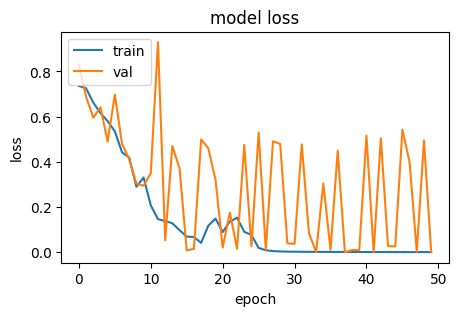

In [60]:
from  matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(5,3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

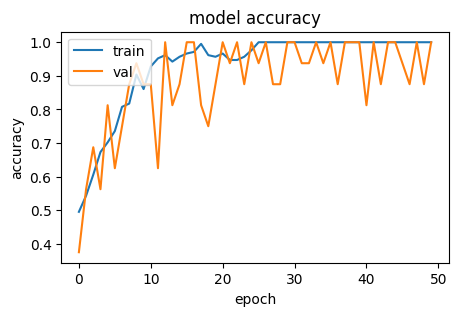

In [61]:
plt.figure(figsize=(5,3))
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()